<a href="https://colab.research.google.com/github/eudesz/AnyoneAI_Group_2/blob/EudesBenitez/Practice_Intro_to_Probability_and_Statistics_Eudes_Benitez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Probability & Statistics

#### TODO:
1. Descriptive Statistics:
    * Calculate statistics such as Mode, Mean, Median and Standard Deviation of weight and age. Do they respond to any known distribution?
    * Carry out an analysis of outliers and missing values.
    * Explain how the metrics vary when we breakdown the dataset by gender. Do they respond to any known distribution? Qualitatively and graphically compare both distributions.
2. Calculate the marginal and joint probability, and the correlation between two other variables, for example alcohol consumption and smoking.
    * Visually represent the joint probability between the possible values of the chosen variables.
3. Answer the following questions: What would happen to smoking levels if smoking is banned in bars? What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?

In [ ]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
young = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/people_responses.csv')

In [ ]:
young.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [ ]:
young['Punctuality'].unique()

array(['i am always on time', 'i am often early',
       'i am often running late', nan], dtype=object)

In [ ]:
young.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 150 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    Music                           float64
 1    Slow songs or fast songs        float64
 2    Dance                           float64
 3    Folk                            float64
 4    Country                         float64
 5    Classical music                 float64
 6    Musical                         float64
 7    Pop                             float64
 8    Rock                            float64
 9    Metal or Hardrock               float64
 10   Punk                            float64
 11   Hiphop, Rap                     float64
 12   Reggae, Ska                     float64
 13   Swing, Jazz                     float64
 14   Rock n roll                     float64
 15   Alternative                     float64
 16   Latino                          float64
 17   Techno, Tran

In [ ]:
young.dtypes.to_frame().T

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,object,object,object,object,object,object


*****
## 1. Descriptive statistics

In [ ]:
young[['Age', 'Height']].median()

Age        20.0
Height    173.0
dtype: float64

In [ ]:
young[['Age', 'Height']].describe()

,Age,Height
count,1003.000000,990.000000
mean,20.433699,173.514141
std,2.828840,10.024505
min,15.000000,62.000000
25%,19.000000,167.000000
50%,20.000000,173.000000
75%,22.000000,180.000000
max,30.000000,203.000000


### Frequency Distribution by Age and Weight

In [ ]:
young['Age'].unique()

array([20., 19., 22., 18., 17., 24., 25., 27., 21., 23., 26., 28., 16.,
       15., nan, 29., 30.])

In [ ]:
young['Age'].value_counts()

19.0    210
20.0    194
21.0    127
18.0    123
22.0     84
17.0     53
23.0     47
25.0     30
16.0     29
24.0     28
28.0     17
26.0     15
27.0     14
15.0     11
29.0     11
30.0     10
Name: Age, dtype: int64

In [ ]:
young['Height'].value_counts()

170.0    86
168.0    62
175.0    56
180.0    55
165.0    54
178.0    43
185.0    43
173.0    41
172.0    38
163.0    34
167.0    29
160.0    28
183.0    24
171.0    23
164.0    23
182.0    22
176.0    22
162.0    20
187.0    19
184.0    19
169.0    19
174.0    19
166.0    18
177.0    18
190.0    17
186.0    16
189.0    15
158.0    15
188.0    13
179.0    13
161.0    10
157.0     9
181.0     9
192.0     9
193.0     8
159.0     5
156.0     5
155.0     5
194.0     4
195.0     4
154.0     3
200.0     3
153.0     3
191.0     2
197.0     2
203.0     2
148.0     1
152.0     1
62.0      1
Name: Height, dtype: int64

In [ ]:
# Age	Height
len(young.groupby('Age').sum().columns.tolist())

138

In [ ]:
young.shape

(1010, 150)

In [ ]:
young.columns.values


array(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies',
       'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
       'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'Internet', 'PC', 'Economy Management', 'Biology',
       'Chemistry', 'Reading', 'Geography', 'Foreign languages',
       'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Musical instruments',
       'Writing', 'Passive sport', 'Active sport', 'Gardening',
       'Celebrities', 'Shopping', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm',
       'Darkness', 'Heights', '

## Calculate statistics such as Mode, Mean, Median and Standard Deviation of weight and age. Do they respond to any known distribution?

In [ ]:
len(young.columns)

150

In [ ]:
print('Height max: ', young['Height'].max())
print('Height min: ', young['Height'].min())
print('Height mean: ', young['Height'].mean())
print('Height mode: ', young['Height'].mode())
print('Height median: ', young['Height'].median())
print('Height std: ', young['Height'].std())


print("_______________________________")
print('Age min: ', young['Age'].min())
print('Age max: ', young['Age'].max())
print('Age mean: ', young['Age'].mean())
print('Age mode: ', young['Age'].mode())
print('Age median: ', young['Age'].median())
print('Age std: ', young['Age'].std())

Height max:  203.0
Height min:  62.0
Height mean:  173.51414141414142
Height mode:  0    170.0
dtype: float64
Height median:  173.0
Height std:  10.024504961198334
_______________________________
Age min:  15.0
Age max:  30.0
Age mean:  20.43369890329013
Age mode:  0    19.0
dtype: float64
Age median:  20.0
Age std:  2.828840098778981


In [ ]:
young.groupby('Height').count()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Age,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
Height,,,,,,,,,,,,,,,,,,,,,
62.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
148.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
152.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
153.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
154.0,3,3,3,3,3,3,3,3,2,3,...,3,3,3,3,3,3,3,3,3,3
155.0,5,5,5,5,5,5,5,5,4,5,...,5,5,5,5,5,5,5,5,5,5
156.0,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
157.0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
158.0,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


### Histogram

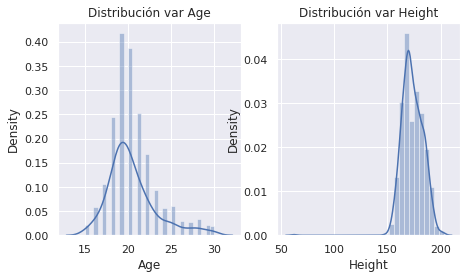

In [ ]:
# Representa los histogramas de los datos completos
plt.figure(figsize=(19,18))
n = 0
for i, column in enumerate(young[['Age', 'Height']].columns):
    n+=1
    plt.subplot(4, 5, n)
    sns.distplot(young[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

#The data have a normal distribution.

In [ ]:
young['Gender'].unique()

array(['female', 'male', nan], dtype=object)

In [ ]:
young_female=young[young['Gender']=='female']
young_male=young[young['Gender']=='male']
# young_male['Gender'].unique()

In [ ]:
young_female.describe()[['Height','Age']]

,Height,Age
count,580.00000,589.000000
mean,167.77069,20.113752
std,7.51952,2.792537
min,62.00000,15.000000
25%,164.00000,18.000000
50%,168.00000,20.000000
75%,172.00000,21.000000
max,186.00000,30.000000


In [ ]:
young_male.describe()[['Height','Age']]

,Height,Age
count,405.000000,409.000000
mean,181.758025,20.872861
std,6.964600,2.796789
min,159.000000,15.000000
25%,178.000000,19.000000
50%,182.000000,20.000000
75%,186.000000,22.000000
max,203.000000,30.000000


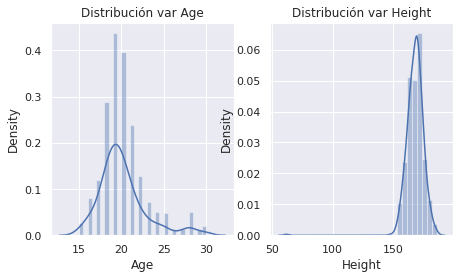

In [ ]:
# Representa los histogramas de los datos completos
plt.figure(figsize=(19,18))
n = 0
for i, column in enumerate(young_female[['Age', 'Height']].columns):
    n+=1
    plt.subplot(4, 5, n)
    sns.distplot(young_female[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

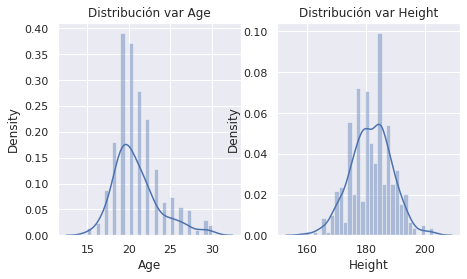

In [ ]:
# Representa los histogramas de los datos
plt.figure(figsize=(19,18))
n = 0
for i, column in enumerate(young_male[['Age', 'Height']].columns):
    n+=1
    plt.subplot(4, 5, n)
    sns.distplot(young_male[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

### Missing values

In [ ]:
young[young['Achievements'].isnull()]['Achievements']

402   NaN
828   NaN
Name: Achievements, dtype: float64

In [ ]:
young['Achievements'].isnull().sum()

2

### Outliers

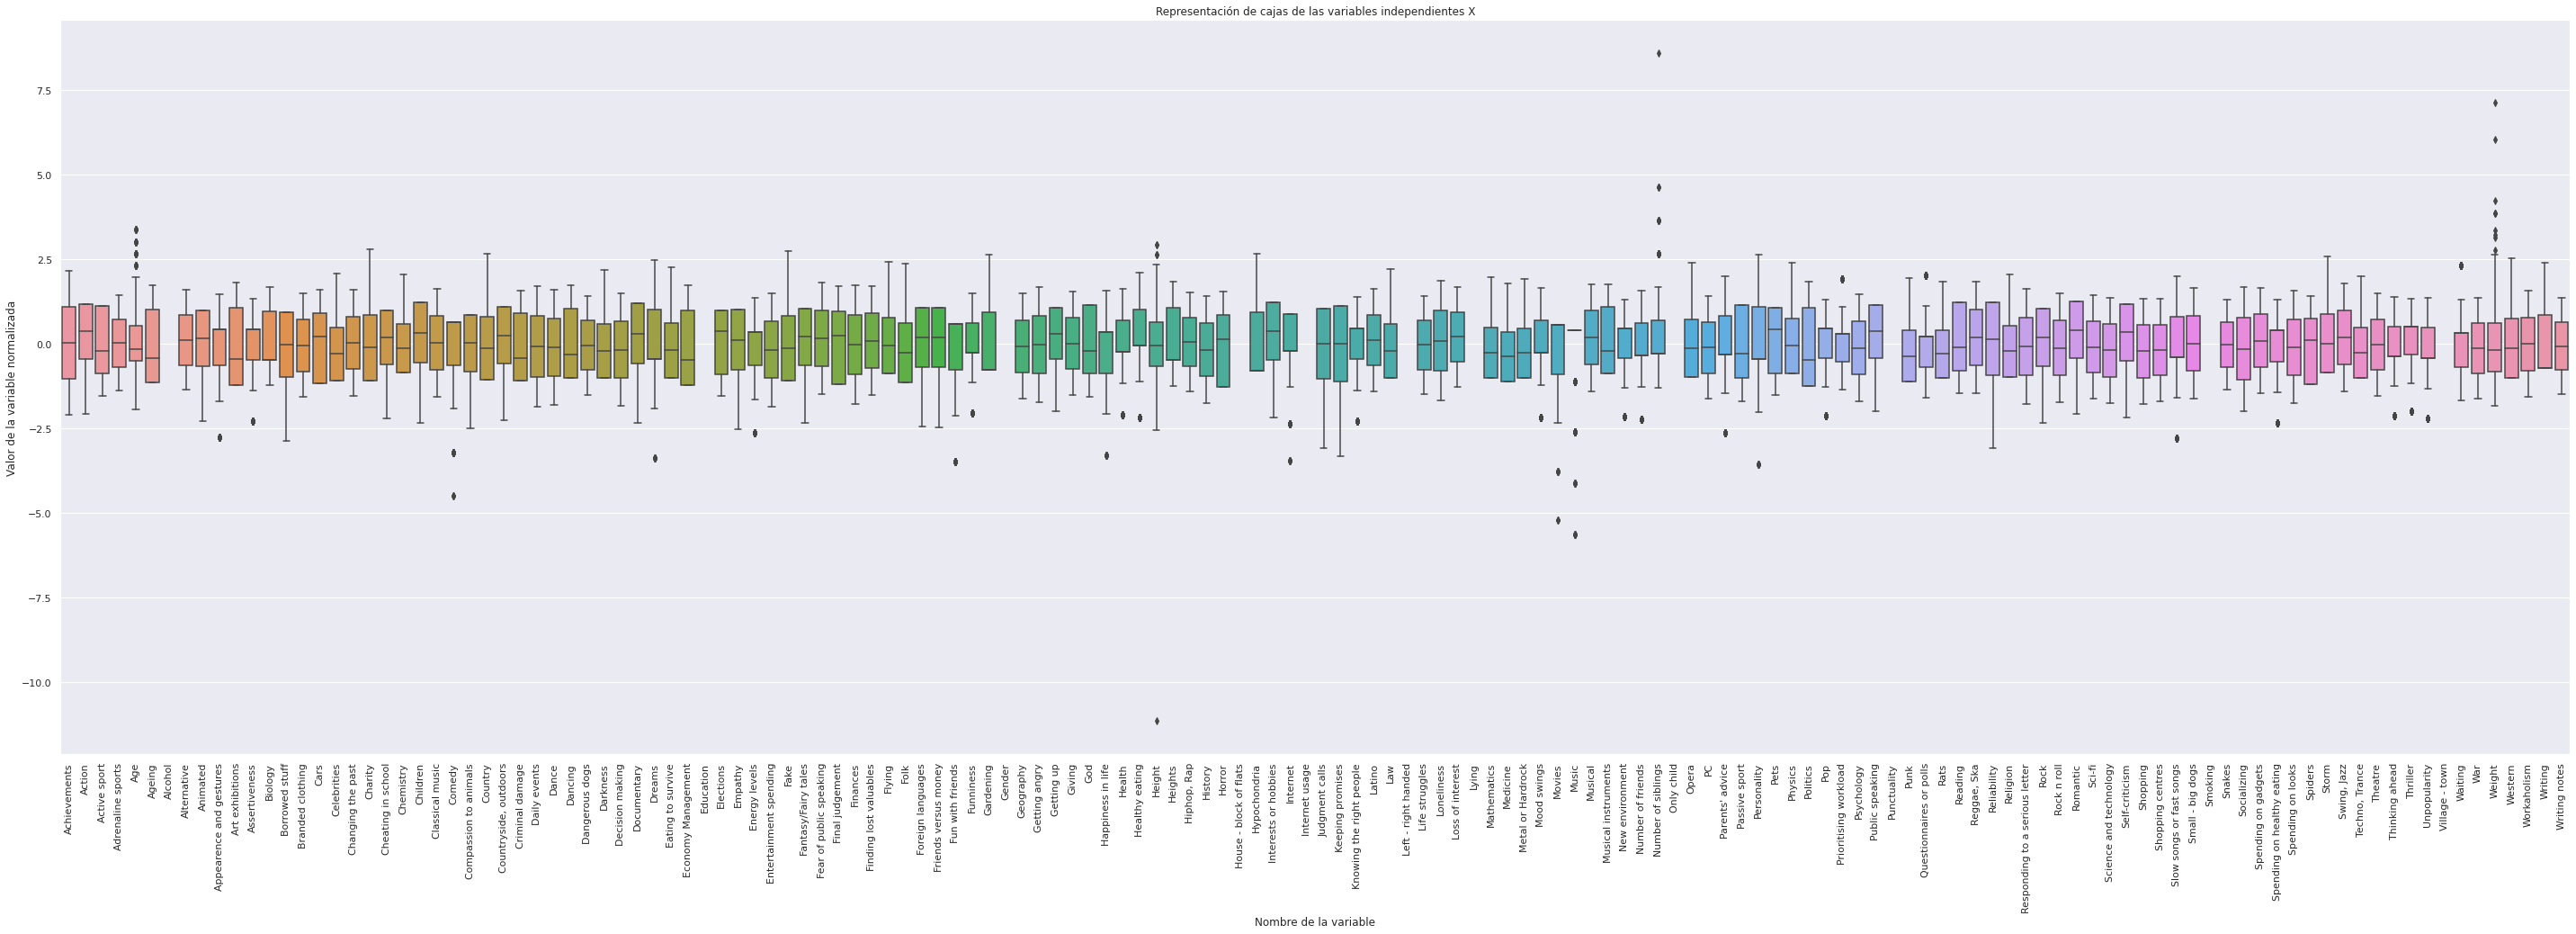

In [ ]:
# Representa los boxplot
# Normaliza para tener rangos comparables en las features. No se normaliza la target
young_normalizado = (young-young.mean())/young.std()
plt.figure(figsize=(50,15))
ax = sns.boxplot(data=young_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

### Gender breakdown

In [ ]:
young.groupby('Gender').count()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Age,Height,Weight,Number of siblings,Left - right handed,Education,Only child,Village - town,House - block of flats
Gender,,,,,,,,,,,,,,,,,,,,,
female,590,591,591,591,592,591,592,593,589,592,...,592,589,580,580,590,591,592,592,591,590
male,411,411,409,408,407,407,410,408,409,410,...,410,409,405,405,409,410,411,410,409,410


#### Correlation between variables

In [ ]:
young[['Smoking','Alcohol']]

,Smoking,Alcohol
0,never smoked,drink a lot
1,never smoked,drink a lot
2,tried smoking,drink a lot
3,former smoker,drink a lot
4,tried smoking,social drinker
...,...,...
1005,current smoker,drink a lot
1006,never smoked,social drinker
1007,tried smoking,social drinker
1008,tried smoking,social drinker


In [ ]:
young['Smoking'].unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [ ]:
young['Alcohol'].unique()

array([3, 2, 1, nan], dtype=object)

In [ ]:
young['Country'].unique()

array([ 2.,  1.,  3.,  4.,  5., nan])

In [ ]:
print("Smoking NA: " , young['Smoking'].isna().sum())
print("Alcohol NA: " , young['Alcohol'].isna().sum())
print("Country NA: " , young['Country'].isna().sum())

data=young[['Alcohol', 'Smoking', 'Country', 'Weight', 'Age']]
data=data.dropna()

print("Smoking NA: " , data['Smoking'].isna().sum())
print("Alcohol NA: " , data['Alcohol'].isna().sum())
print("Country NA: " , data['Country'].isna().sum())
print("data size: ", data.shape)

Smoking NA:  8
Alcohol NA:  5
Country NA:  5
Smoking NA:  0
Alcohol NA:  0
Country NA:  0
data size:  (972, 5)


In [ ]:
data['Smoking']=np.where(data['Smoking']=='never smoked', 1.0 , data['Smoking'])
data['Smoking']=np.where(data['Smoking']=='tried smoking', 2.0 , data['Smoking'])
data['Smoking']=np.where(data['Smoking']=='former smoker', 3.0 , data['Smoking'])
data['Smoking']=np.where(data['Smoking']=='current smoker', 4.0 , data['Smoking'])

data['Alcohol']=np.where(data['Alcohol']=='never', 1, data['Alcohol'])
data['Alcohol']=np.where(data['Alcohol']=='social drinker', 2, data['Alcohol'])
data['Alcohol']=np.where(data['Alcohol']=='drink a lot', 3, data['Alcohol'])

data['Smoking']=data['Smoking'].astype('float')
data['Alcohol']=data['Alcohol'].astype('float')
data['Alcohol']=data['Alcohol'].astype('float')


print('Smoking type: ', data['Smoking'].astype('float').dtype)
print('Alcohol type: ', data['Alcohol'].astype('float').dtype)
print('Country type: ', data['Alcohol'].astype('float').dtype)
print(data['Smoking'].unique())
print(data['Alcohol'].unique())
print(data['Country'].unique())


Smoking type:  float64
Alcohol type:  float64
Country type:  float64
[1. 2. 3. 4.]
[3. 2. 1.]
[2. 1. 3. 4. 5.]


In [ ]:
data

,Alcohol,Smoking,Country,Weight,Age
0,3.0,1.0,2.0,48.0,20.0
1,3.0,1.0,1.0,58.0,19.0
2,3.0,2.0,3.0,67.0,20.0
3,3.0,3.0,1.0,59.0,22.0
4,2.0,2.0,2.0,59.0,20.0
...,...,...,...,...,...
1005,3.0,4.0,2.0,57.0,20.0
1006,2.0,1.0,3.0,80.0,27.0
1007,2.0,2.0,2.0,75.0,18.0
1008,2.0,2.0,1.0,58.0,25.0


In [ ]:
data.corr(method='pearson')

,Alcohol,Smoking,Country,Weight,Age
Alcohol,1.000000,0.322421,-0.007367,0.033109,0.042472
Smoking,0.322421,1.000000,-0.102247,0.070636,0.089673
Country,-0.007367,-0.102247,1.000000,0.075781,0.070423
Weight,0.033109,0.070636,0.075781,1.000000,0.243077
Age,0.042472,0.089673,0.070423,0.243077,1.000000


In [ ]:
#73   Smoking                         object 
#74   Alcohol                         object 
matriz_correlaciones = data.corr(method='pearson')
matriz_correlaciones


,Alcohol,Smoking,Country,Weight,Age
Alcohol,1.000000,0.322421,-0.007367,0.033109,0.042472
Smoking,0.322421,1.000000,-0.102247,0.070636,0.089673
Country,-0.007367,-0.102247,1.000000,0.075781,0.070423
Weight,0.033109,0.070636,0.075781,1.000000,0.243077
Age,0.042472,0.089673,0.070423,0.243077,1.000000


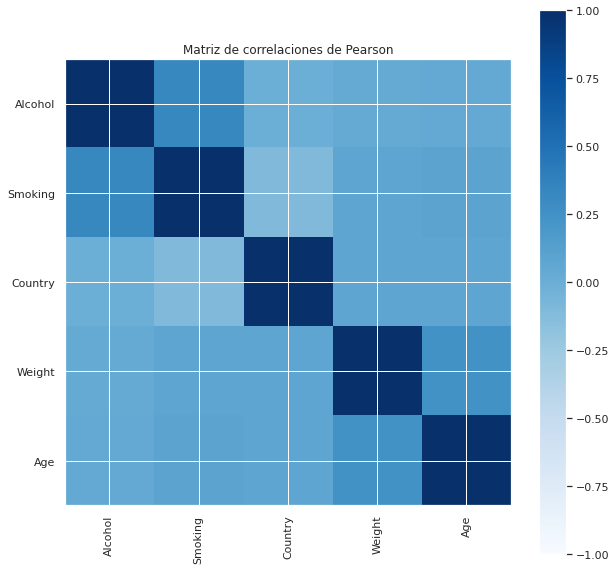

In [ ]:

matriz_correlaciones = data.corr(method='pearson')
n_ticks = len(data.columns)
plt.figure( figsize=(10, 10) )
plt.xticks(range(n_ticks), data.columns, rotation='vertical')
plt.yticks(range(n_ticks), data.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')


****
## 2. Joint probability

#### To do this we will define the concepts of marginal probability and joint probability

Marginal Probability: Probability of one variable without considering another, for example:

$$P_X=P[X=x]=\sum_{\forall y_i}p_{xy}(x,y_i)$$

In [ ]:
# data['Alcohol']=np.where(data['Alcohol']=='never', 1, data['Alcohol'])
# data['Alcohol']=np.where(data['Alcohol']=='social drinker', 2, data['Alcohol'])
# data['Alcohol']=np.where(data['Alcohol']=='drink a lot', 3, data['Alcohol'])

young['Alcohol'].unique()



array([3, 2, 1, nan], dtype=object)

In [ ]:
P_never=data[data['Alcohol']==1]['Alcohol'].count()/data['Alcohol'].count()
P_social=data[data['Alcohol']==2]['Alcohol'].count()/data['Alcohol'].count()
P_lot=data[data['Alcohol']==3]['Alcohol'].count()/data['Alcohol'].count()
print(f'P_never: {P_never} , P_social:  {P_social} , P_lot: {P_lot} ')

P_never: 0.11522633744855967 , P_social:  0.6594650205761317 , P_lot: 0.22530864197530864 


In [ ]:
P_never_social=P_never*P_social/P_social
P_never_lot=P_never*P_lot/P_lot

print(f'P_never_social: {P_never_social} , P_never_lot: {P_never_lot}')

P_never_social: 0.11522633744855967 , P_never_lot: 0.11522633744855967


In [ ]:
P_female=young[young['Gender']=='female']['Gender'].count()/young['Gender'].count()
P_male=1-P_female
print('Probability_female: ', P_female)
print('Probability_male :', P_male)

Probability_female:  0.5906374501992032
Probability_male : 0.4093625498007968


#### Joint Probability: In a bivariate or multimavariate sample space, each possible outcome refers to two or more characteristics. Then the probability of a joint outcome is denoted $P(X \cap Y)$ and is defined as:

$$P_{XY}=P[(X=x)\cap(Y=y)]$$

__TODO:__
Do some research on [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) pandas function.

In [ ]:
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
              "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
              "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
              "shiny", "dull", "shiny", "shiny", "shiny"],
             dtype=object)
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

****
## 3. Answers
### Smoking levels and smoking bans in bars

Calculate the marginal and joint probability, and the correlation between two other variables, for example alcohol consumption and smoking.
Visually represent the joint probability between the possible values of the chosen variables.
Answer the following questions: What would happen to smoking levels if smoking is banned in bars? What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?

In [ ]:
#'Smoking' 
young.columns.values

array(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies',
       'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
       'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'Internet', 'PC', 'Economy Management', 'Biology',
       'Chemistry', 'Reading', 'Geography', 'Foreign languages',
       'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Musical instruments',
       'Writing', 'Passive sport', 'Active sport', 'Gardening',
       'Celebrities', 'Shopping', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm',
       'Darkness', 'Heights', '

****
# Extras:

## Other data visualizations

#### We choose some characteristics (numerical) and analyze them breaking down by gender using a box plot

In [ ]:
#Number of siblings
q1=young['Weight'].quantile(q=0.25)
q3=young['Weight'].quantile(q=0.75)
print(q1)
print(q3)
IQR = q3-q1
print(IQR)
Li=q1-1.5*IQR
Ls=q3+1.5*IQR
print(Li)
print(Ls)


55.0
75.0
20.0
25.0
105.0


In [ ]:
young[young['Weight']>Ls]['Weight']


292    120.0
612    110.0
715    111.0
793    120.0
796    113.0
859    125.0
885    165.0
973    120.0
992    150.0
Name: Weight, dtype: float64

In [ ]:
young_filtered=young[young['Weight']<Ls]

In [ ]:
#Number of siblings
q1=young_filtered['Weight'].quantile(q=0.25)
q3=young_filtered['Weight'].quantile(q=0.75)
print(q1)
print(q3)
IQR = q3-q1
print(IQR)
Li=q1-1.5*IQR
Ls=q3+1.5*IQR
print(Li)
print(Ls)


55.0
75.0
20.0
25.0
105.0


In [ ]:
young_filtered[young_filtered['Weight']>Ls]['Weight']

Series([], Name: Weight, dtype: float64)